In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from oneVar import fixedPoint
from scipy.optimize import fixed_point

# Métodos numéricos

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Curso Propedeutico del Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


Junio 2025

Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

## 1.2 Algoritmo de iteración de punto fijo

### 1.2.1 Explicación del algoritmo

1. **Obtener una fórmula "predictora" de la raíz de la ecuación $x=g(x)$**
    - La ecuación original se escribe como: $f(x)=0$.
    - La fórmula predictora, $x=g(x)$ se puede obtener por varios métodos, e.g.:
        - manipulación algebráica de $f(x)$.
        - agregando $x$ a ambos lados de la ecuación $f(x)$.

2. **Establecer un estimado inicial del valor de la raíz, $x_r$.**
    - El valor inicial es crítico.
    - Se puede estimar por medio de métodos gráficos.

3. **Proceso iterativo para determinar la raíz utilizando la fórmula $x=g(x)$.**
    - Evaluar el nuevo estimado con la fórmula $x=g(x)$:
        - $x_{i+1} = g(x_i)$.
    - Utilizar un factor de relajación para obtener convergencia:
        - $x_{i+1} = \lambda x_{i+1} + (1-\lambda) x_{i}$.
        - $0 < \lambda < 1$.
    - Si $f(x_m) < \varepsilon_s$ (Tolerancia):
        - Entonces la raíz $x_r$, es aproximadamente igual a $x_{i+1}$.
        - $x_r \approx x_{i+1}$.

### 1.2.2 Implementación del método

Se utiliza la implementación del algoritmo de punto fijo escrita en la función `fixed_point1()` dentro del archivo `oneVar.py`.

In [3]:
help(fixedPoint)

Help on function fixedPoint in module oneVar:

fixedPoint(f, g, xi, lamb=1.0, tol=None, niter=10)
    Basic bisection algorithm for finding the root of a one-variable equation
    
    Parameters
    ----------
    f : function
        Python function returning a number.  `f` must be continuous.
    g : function
        Python function returning a number. `g` must be continuous.
        g is the "root-predictor" function.
    xi : scalar
        initial guess for root.
    lamb : scalar
        relaxation factor
    tol : scalar
        tolerance of the method, [0, 1]
    niter : int
        maximum number of iterations of the method.
        Default value is 100.
    
    Returns
    -------
    m : float
        value of xm (midpoint) at the last iteration.
    n: float
        number of iterations of the method



#### Ejemplo: Función exponencial

In [6]:
# función a evaluar y fórmula para la raíz
f = lambda x: np.exp(-x) - x
g = lambda x: np.exp(-x)
# valor inicial
l, u = -2, 2
x0 = 0
# numero de iteraciones
niter = 5

  i  	 xi  		 f(xi)
  1	 1.000000e+00	-6.321206e-01
  2	 3.678794e-01	 3.243212e-01
  3	 6.922006e-01	-1.917271e-01
  4	 5.004735e-01	 1.057700e-01
  5	 6.062435e-01	-6.084775e-02


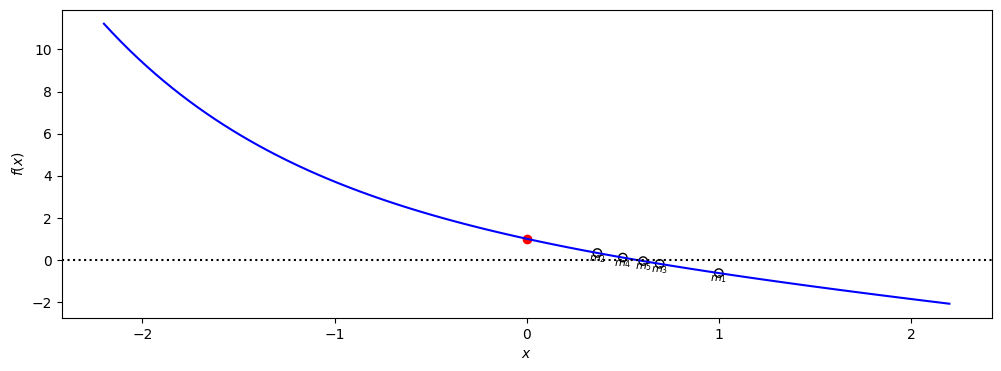

In [7]:
# Gráfico ilustrativo del método
fig, ax = plt.subplots(figsize=(12, 4))

# gráfico de la función
x = np.linspace(1.1*l, 1.1*u, 100)
ax.plot(x, f(x), color='b')
ax.scatter(x0, f(x0), color='r')
ax.axhline(0, ls=':', color='k')
ax.set(xlabel=r'$x$', ylabel=r'$f(x)$')

print(f"  i  \t xi  \t\t f(xi)")
# lista con resultados
for its in range(1,niter+1):
    m, n = fixedPoint(f, g, xi=x0, lamb=1.0, tol=None, niter=its)
    ax.scatter(m, f(m), color='k', facecolor="None")
    ax.text(m, f(m), r"$m_{:d}$".format(n), fontsize=8,
            ha='center', va='top')
    # valores en pantalla
    print(f"{its:3}\t{m:13.6e}\t{f(m):13.6e}")

**Preguntas**: 

- ¿Tras cuántas iteraciones se obtiene una estimación aceptable de $x_r$?

- ¿Cuál es el efecto de especificar un criterio de convergencia más estricto sobre el número de iteraciones?

In [ ]:
# lista con resultados
tols = np.logspace(0, -12, 13)
print(" its  tol       x         abs(f(x))")
for tol in tols:
    m, n = fixedPoint(f, g, xi=0, lamb=1, tol=tol, niter=100)
    print(f"{n:4d}, {tol:.2e}, {m:.6f}, {abs(f(m)):12.6e}")

 its  tol       x         abs(f(x))
   1, 1.00e+00, 1.000000, 6.321206e-01
   5, 1.00e-01, 0.606244, 6.084775e-02
   9, 1.00e-02, 0.571143, 6.263768e-03
  13, 1.00e-03, 0.567557, 6.477254e-04
  17, 1.00e-04, 0.567186, 6.701004e-05
  21, 1.00e-05, 0.567148, 6.932802e-06
  25, 1.00e-06, 0.567144, 7.172652e-07
  29, 1.00e-07, 0.567143, 7.420803e-08
  33, 1.00e-08, 0.567143, 7.677540e-09
  37, 1.00e-09, 0.567143, 7.943159e-10
  41, 1.00e-10, 0.567143, 8.217960e-11
  45, 1.00e-11, 0.567143, 8.502199e-12
  49, 1.00e-12, 0.567143, 8.796297e-13


#### Ejemplo: Función trigonométrica

In [16]:
# función a evaluar
f = lambda x: np.sin(x)
g = lambda x: np.sin(x) + x
# intervalo para acotar
l, u = -2, 2
x0 = 0.5
# numero de iteraciones
niter = 5

  i  	 xi  		 f(xi)
  1	 9.794255e-01	 8.301772e-01
  2	 1.809603e+00	 9.716210e-01
  3	 2.781224e+00	 3.526194e-01
  4	 3.133843e+00	 7.749359e-03
  5	 3.141593e+00	 7.756359e-08


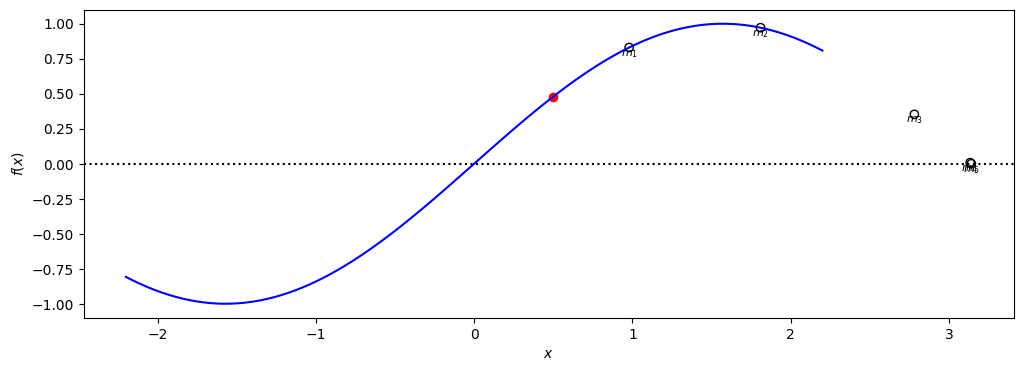

In [17]:
# Gráfico ilustrativo del método
fig, ax = plt.subplots(figsize=(12, 4))

# gráfico de la función
x = np.linspace(1.1*l, 1.1*u, 100)
ax.plot(x, f(x), color='b')
ax.scatter(x0, f(x0), color='r')
ax.axhline(0, ls=':', color='k')
ax.set(xlabel=r'$x$', ylabel=r'$f(x)$')

print(f"  i  \t xi  \t\t f(xi)")
# lista con resultados
for its in range(1,niter+1):
    m, n = fixedPoint(f, g, xi=x0, lamb=1.0, tol=None, niter=its)
    ax.scatter(m, f(m), color='k', facecolor="None")
    ax.text(m, f(m), r"$m_{:d}$".format(n), fontsize=8,
            ha='center', va='top')
    # valores en pantalla
    print(f"{its:3}\t{m:13.6e}\t{f(m):13.6e}")

**Preguntas**: 

- ¿Qué sucede cuando se modifica el intervalo de acotamiento para encontrar la raíz?

- ¿Por qué es necesario implementar un criterio de convergencia al algorítmo de bisección?

In [18]:
# lista con resultados
tols = np.logspace(0, -12, 13)
print(" its  tol       x         abs(f(x))")
for tol in tols:
    m, n = fixedPoint(f, g, xi=x0, lamb=1, tol=tol, niter=100)
    print(f"{n:4d}, {tol:.2e}, {m:.6f}, {abs(f(m)):12.6e}")

 its  tol       x         abs(f(x))
   1, 1.00e+00, 0.979426, 8.301772e-01
   4, 1.00e-01, 3.133843, 7.749359e-03
   4, 1.00e-02, 3.133843, 7.749359e-03
   5, 1.00e-03, 3.141593, 7.756359e-08
   5, 1.00e-04, 3.141593, 7.756359e-08
   5, 1.00e-05, 3.141593, 7.756359e-08
   5, 1.00e-06, 3.141593, 7.756359e-08
   5, 1.00e-07, 3.141593, 7.756359e-08
   6, 1.00e-08, 3.141593, 1.224647e-16
   6, 1.00e-09, 3.141593, 1.224647e-16
   6, 1.00e-10, 3.141593, 1.224647e-16
   6, 1.00e-11, 3.141593, 1.224647e-16
   6, 1.00e-12, 3.141593, 1.224647e-16


### 1.2.3 Utilización del método implementado en `scipy`

In [ ]:
help(fixed_point)

Help on function fixed_point in module scipy.optimize._minpack_py:

fixed_point(func, x0, args=(), xtol=1e-08, maxiter=500, method='del2')
    Find a fixed point of the function.
    
    Given a function of one or more variables and a starting point, find a
    fixed point of the function: i.e., where ``func(x0) == x0``.
    
    Parameters
    ----------
    func : function
        Function to evaluate.
    x0 : array_like
        Fixed point of function.
    args : tuple, optional
        Extra arguments to `func`.
    xtol : float, optional
        Convergence tolerance, defaults to 1e-08.
    maxiter : int, optional
        Maximum number of iterations, defaults to 500.
    method : {"del2", "iteration"}, optional
        Method of finding the fixed-point, defaults to "del2",
        which uses Steffensen's Method with Aitken's ``Del^2``
        convergence acceleration [1]_. The "iteration" method simply iterates
        the function until convergence is detected, without attempt

#### Ejemplo: Función exponencial

In [ ]:
# función a evaluar
f = lambda x: np.exp(-x) - x
g = lambda x: np.exp(-x)
# valor inicial
x0 = 1
# tolerancia
tol = 1e-12

# cálculo de raíz por el método de bisección
xr = fixed_point(g, x0, xtol=tol)
print(f"x={xr}, f(x)={f(xr)}")

x=0.5671432904097838, f(x)=0.0


#### Ejemplo: Función trigonométrica

In [ ]:
# función a evaluar
f = lambda x: np.sin(x)
g = lambda x: np.sin(x) + x
# valor inicial
x0 = 0.5
# tolerancia
tol = 1e-12

# cálculo de raíz por el método de bisección
xr = fixed_point(g, x0, xtol=tol)
print(f"x={xr}, f(x)={f(xr)}")

x=0.0, f(x)=0.0


#### Ejemplo: Ecuación cúbica de tercer grado (parametrizada)

In [ ]:
def f(x, a, b, c, d):
    return a*(x)**3 + b*(x)**2 + c*x + d

In [ ]:
def g(x, a, b, c, d):
    return -1/np.power(a,1/3) * np.power(b*(x)**2 + c*x + d, 1/3)

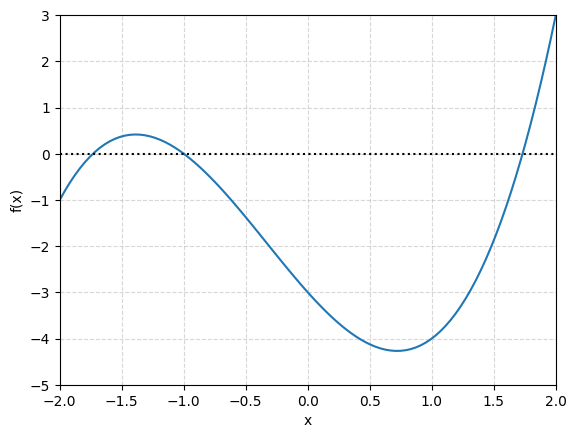

In [ ]:
fig, ax = plt.subplots()

x = np.linspace(-2, 2, 100)
a, b, c, d = 1, 1, -3, -3
y = f(x, a, b, c, d)

ax.plot(x, y)
ax.axhline(0, ls=':', color='k')
ax.grid(ls='--', alpha=0.5)
ax.set(xlim=(-2, 2), ylim=(-5, 3), xlabel='x', ylabel='f(x)')
plt.show()

**Preguntas**:

- Gráficamente se observa que la ecuación tiene tres raíces. Encuéntrelas mediante el método de punto fijo.


In [ ]:
xr = fixed_point(g, -2, args=(a, b, c, d), xtol=1e-8)
print(f"x={xr}, f(x)={f(xr, a, b, c, d)}")

x=-1.732050807568878, f(x)=-2.6645352591003757e-15


In [ ]:
xr = fixed_point(g, -1.1, args=(a, b, c, d), xtol=1e-8)
print(f"x={xr}, f(x)={f(xr, a, b, c, d)}")

x=-0.9999999999999996, f(x)=-8.881784197001252e-16


In [ ]:
xr = fixed_point(g, 1.5, args=(a, b, c, d), xtol=1e-8)
print(f"x={xr}, f(x)={f(xr, a, b, c, d)}")

/tmp/ipykernel_8466/3676070808.py:2: RuntimeWarning: invalid value encountered in power
  return -1/np.power(a,1/3) * np.power(b*(x)**2 + c*x + d, 1/3)


RuntimeError: Failed to converge after 500 iterations, value is nan